In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot as hv
import hvplot.pandas
import holoviews
#import pingouin as pg
from IPython.display import display

%matplotlib inline

In [4]:
data=pd.read_csv("Speed Dating Data.csv", encoding= 'unicode_escape')
pd.options.display.max_columns = None

data.rename(columns={"gender": "Gender", 
                     "condtn":"Condition",
                     "mn_sat":"median_sat",
                     "age_o":"age of partner",
                     "race_o":"race of partner",
                     "pf_o_att":"partner stated preference",
                     "dec_o":"partner's decision",
                     "attr_o":"partner rating of attributes",
                     "imprace":"race importance",
                     "imprelig":"religion importance",
                     "from":"originally from",
                     "date":"frequency of date"}, inplace=True)

race_replacement={1:"Black/African American",
                 2: "European/Caucasion-American",
                 3: "Latino/Hispanic American",
                 4: "Asian/Pacific Islander/Asian-American",
                 5: "Native American",
                 6: "Other"}

field_replacement={1:"Law",
                   2:"Math",
                   3:"Social Science, Psychologist",
                   4:"Medican Science, Pharmaceuticals, and Bio Tech",
                   5:"Engineering",
                   6:"English/Creative Writing / Journalism",
                   7:"History/ Religion/ Philosophy",
                   8:"Business/Econ/Finance",
                   9:"Education, Academia",
                   10:"Biological Sciences / Chemistry/ Physics",
                   11:"Social Work",
                   12:"Undergrad/undecided",
                   13:"Political Science/ International Affairs",
                   14:"Film",
                   15:"Fine Arts / Arts Administration",
                   16:"Languages",
                   17:"Architecture",
                   18:"Other"}

career_replacement={1: "Lawyer",
                   2:  "Academic / Research",
                   3:  "Psychologist",
                   4:  "Doctor/Medicine",
                   5:  "Engineer",
                   6:  "Creative Arts/ Entertainment",
                   7:  "Banking / Consulting /Finance / Marketing/ Business /CEO/ Entrepreneur / Admin",
                   8:  "Real Estate",
                   9:  "International /Humanitarian Affairs",
                   10:  "Undecided",
                   11:  "Social Work",
                   12:  "Speech Pathology",
                   13:  "Politics",
                   14:  "Pro Sports / Athletics",
                   15:  "Other",
                   16:  "Journalism",
                   17:  "Architecture"}

decision_replacement={1:"Yes", 0:"No"}
length_replacement={1:"Too little",
                   2: "Too much",
                   3: "Just Right"}



data["Gender"].replace({0:"Female",1:"Male"}, inplace=True)
data["Condition"].replace({1:"Limited choice", 2:"Extensive choice"}, inplace=True)
data["match"].replace({1:"Yes",0:"No"}, inplace=True)
data["samerace"].replace({1:"Yes",0:"No"},inplace=True)
data["race of partner"].replace(race_replacement, inplace=True)
data["partner's decision"].replace(decision_replacement, inplace=True)
data["field_cd"].replace(field_replacement, inplace=True)
data["race"].replace(race_replacement, inplace=True)
data["career_c"].replace(career_replacement, inplace=True)
data["length"].replace(length_replacement, inplace=True)
data["numdat_2"].replace({1:"Too few", 2: "Too many", 3: "Just Right"}, inplace=True)
data["date_3"].replace({1:"Yes", 2:"No", 0:np.nan}, inplace=True)

display(data)

,iid,id,Gender,idg,Condition,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age of partner,race of partner,partner stated preference,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,partner's decision,partner rating of attributes,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,median_sat,tuition,race,race importance,religion importance,originally from,zipcode,income,goal,frequency of date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,Female,1,Limited choice,1,10,7,NaN,4,1,11.0,No,0.14,No,27.0,European/Caucasion-American,35.0,20.0,20.0,20.0,0.0,5.0,No,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Too much,Too few,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,Female,1,Limited choice,1,10,7,NaN,3,2,12.0,No,0.54,No,22.0,European/Caucasion-American,60.0,0.0,0.0,40.0,0.0,0.0,No,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Too much,Too few,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,Female,1,Limited choice,1,10,7,NaN,10,3,13.0,Yes,0.16,Yes,22.0,Asian/Pacific Islander/Asian-American,19.0,18.0,19.0,18.0,14.0,12.0,Yes,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Too much,Too few,NaN,NaN,NaN

In [207]:
#data.corr(method="spearman").style.background_gradient()

In [208]:

#sns.heatmap(data.corr(method="spearman"), cmap="BuPu", annot=True).set_title("Correlation");

In [5]:
def missing_values(df):
    missing=pd.DataFrame(df.isnull().sum()/len(data))*100
    missing.columns = ['missing_values(%)']
    missing['missing_values(numbers)'] = pd.DataFrame(df.isnull().sum())
    return missing.sort_values(by='missing_values(%)', ascending=False)
missing_values(data)


,missing_values(%),missing_values(numbers)
num_in_3,92.026737,7710
numdat_3,82.143710,6882
date_3,82.119838,6880
expnum,78.515159,6578
sinc7_2,76.665075,6423
...,...,...
wave,0.000000,0
Condition,0.000000,0
idg,0.000000,0
Gender,0.000000,0


In [7]:
print(data.columns.tolist())

['iid', 'id', 'Gender', 'idg', 'Condition', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age of partner', 'race of partner', 'partner stated preference', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', "partner's decision", 'partner rating of attributes', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'median_sat', 'tuition', 'race', 'race importance', 'religion importance', 'originally from', 'zipcode', 'income', 'goal', 'frequency of date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 's

In [190]:
general_data = data[data.columns[:69]]
general_data.head()

,iid,id,Gender,idg,Condition,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age of partner,race of partner,partner stated preference,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,partner's decision,partner rating of attributes,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,median_sat,tuition,race,race importance,religion importance,originally from,zipcode,income,goal,frequency of date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum
0,1,1.0,Female,1,Limited choice,1,10,7,NaN,4,1,11.0,No,0.14,No,27.0,European/Caucasion-American,35.0,20.0,20.0,20.0,0.0,5.0,No,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0
1,1,1.0,Female,1,Limited choice,1,10,7,NaN,3,2,12.0,No,0.54,No,22.0,European/Caucasion-American,60.0,0.0,0.0,40.0,0.0,0.0,No,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0
2,1,1.0,Female,1,Limited choice,1,10,7,NaN,10,3,13.0,Yes,0.16,Yes,22.0,Asian/Pacific Islander/Asian-American,19.0,18.0,19.0,18.0,14.0,12.0,Yes,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0
3,1,1.0,Female,1,Limited choice,1,10,7,NaN,5,4,14.0,Yes,0.61,No,23.0,European/Caucasion-American,30.0,5.0,15.0,40.0,5.0,5.0,Yes,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0
4,1,1.0,Female,1,Limited choice,1,10,7,NaN,7,5,15.0,Yes,0.21,No,24.0,Latino/Hispanic American,30.0,10.0,20.0,10.0,10.0,20.0,Yes,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0


In [10]:
dfl=pd.melt(data, id_vars=data.columns[:69], value_vars=data.columns[69:], var_name="Survey", value_name="Response")
dfl.head()

,iid,id,Gender,idg,Condition,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age of partner,race of partner,partner stated preference,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,partner's decision,partner rating of attributes,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,median_sat,tuition,race,race importance,religion importance,originally from,zipcode,income,goal,frequency of date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,Survey,Response
0,1,1.0,Female,1,Limited choice,1,10,7,NaN,4,1,11.0,No,0.14,No,27.0,European/Caucasion-American,35.0,20.0,20.0,20.0,0.0,5.0,No,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,attr1_1,15
1,1,1.0,Female,1,Limited choice,1,10,7,NaN,3,2,12.0,No,0.54,No,22.0,European/Caucasion-American,60.0,0.0,0.0,40.0,0.0,0.0,No,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,attr1_1,15
2,1,1.0,Female,1,Limited choice,1,10,7,NaN,10,3,13.0,Yes,0.16,Yes,22.0,Asian/Pacific Islander/Asian-American,19.0,18.0,19.0,18.0,14.0,12.0,Yes,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,attr1_1,15
3,1,1.0,Female,1,Limited choice,1,10,7,NaN,5,4,14.0,Yes,0.61,No,23.0,European/Caucasion-American,30.0,5.0,15.0,40.0,5.0,5.0,Yes,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,attr1_1,15
4,1,1.0,Female,1,Limited choice,1,10,7,NaN,7,5,15.0,Yes,0.21,No,24.0,Latino/Hispanic American,30.0,10.0,20.0,10.0,10.0,20.0,Yes,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,attr1_1,15


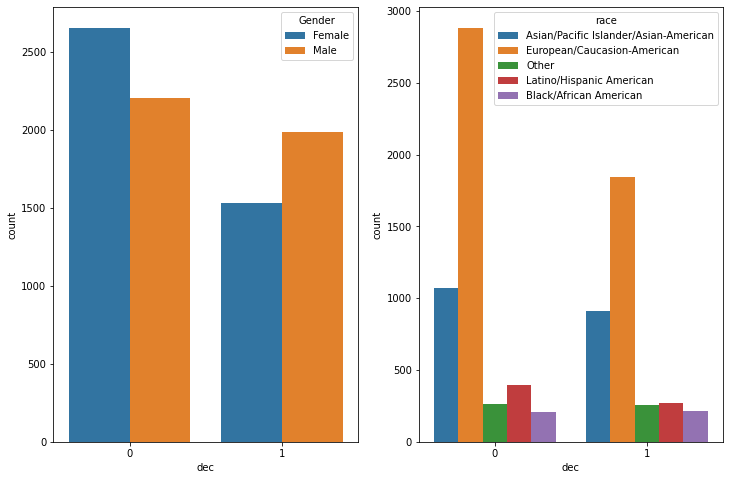

In [11]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=[12,8])
sns.countplot(data=data, hue ="Gender", x="dec", ax=ax1);
sns.countplot(data=data, hue ="race", x="dec", ax=ax2);

<AxesSubplot:ylabel='age'>

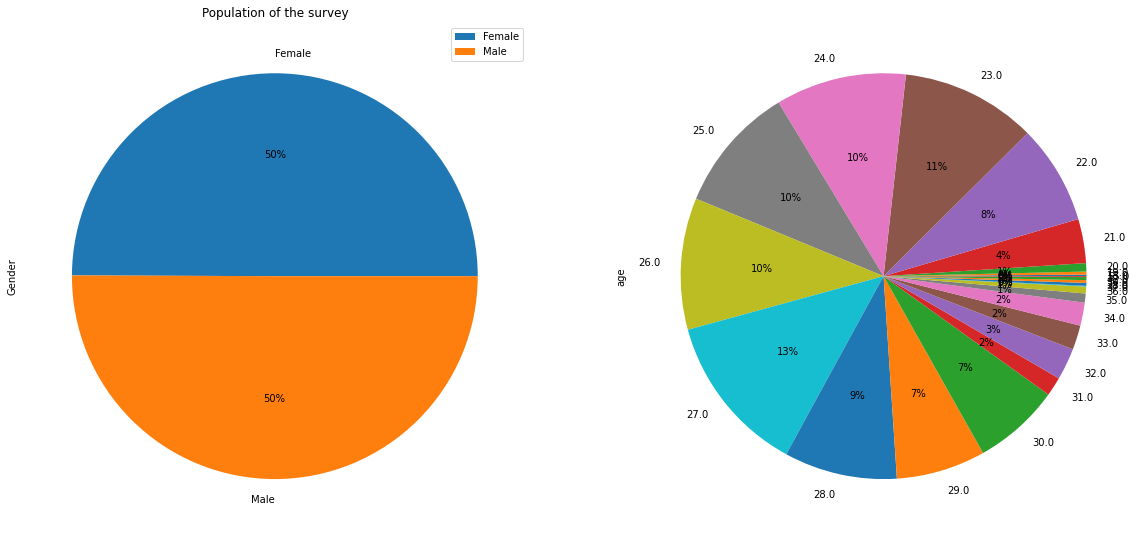

In [12]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=[20,20])

(data
 .groupby("Gender")
 [["Gender"]]
 .count()
).plot.pie(y="Gender",autopct='%1.0f%%', ax=ax1).set_title("Population of the survey");

(data
.groupby("age")
 ["age"]
 .count()
).plot.pie(y="age", autopct='%1.0f%%', ax=ax2)



In [13]:
data.pivot_table(values="id", aggfunc=len, index=data["Gender"], columns=data[["race"]]).style.background_gradient()

race,Asian/Pacific Islander/Asian-American,Black/African American,European/Caucasion-American,Latino/Hispanic American,Other
Gender,,,,,
Female,1045.000000,241.000000,2207.000000,403.000000,245.000000
Male,937.000000,179.000000,2520.000000,261.000000,277.000000


In [14]:
cor=data.corr(method="spearman")
corr_target=abs(cor["partner rating of attributes"])
corr_target[corr_target>=0.50]

partner rating of attributes    1.000000
fun_o                           0.570183
like_o                          0.653525
Name: partner rating of attributes, dtype: float64

<AxesSubplot:xlabel='partner rating of attributes', ylabel='like_o'>

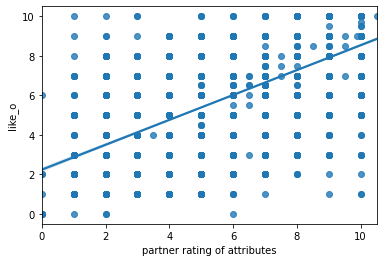

In [20]:
sns.regplot(data=data, y="like_o", x="partner rating of attributes")